# Python 與機器學習（5）

## 郭耀仁

## 線性不可分

- 目前介紹的 `Perceptron`、`Adaline` 與 `Logistic Regression` 都是處理線性可分的資料
- 什麼樣的資料這些分類器會分得很差？

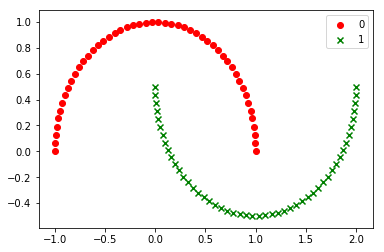

In [1]:
# 線性不可分（2）
# 像是這樣子的資料：
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples = 100, random_state = 0)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r', marker = 'o', label = '0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'g', marker = 'x', label = '1')
plt.legend()
plt.show()

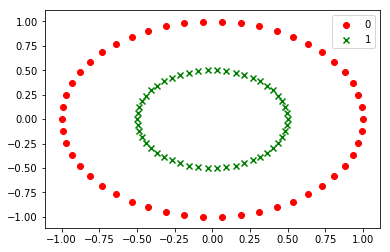

In [2]:
# 線性不可分（3）
# 或是像這樣子的資料：
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples = 100, random_state = 0, factor = 0.5)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r', marker = 'o', label = '0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'g', marker = 'x', label = '1')
plt.legend()
plt.show()

## 線性不可分（4）

- 面對線性不可分的資料，我們可以採取：
    - 支持向量機（Support Vector Machine，SVM）
    - 決策樹（Decision Tree）
    - K 最近鄰（K-nearest neighbor，KNN）

## 支持向量機

- 將資料投射到可以用一個超平面（Hyper-plane）分離的空間中：

$$\phi(x_1, x_2) = z$$

$$z = x_1^{2} + x_2^{2}$$

![SVM](https://storage.googleapis.com/py_ml_images/svm.png)

## 支持向量機（2）

- 最常見的 $\phi()$ 函數（RBF kernel）：

$$k(x^{i}, x^{j}) = \exp(-\gamma \parallel x^{i}-x^{j} \parallel ^2 )$$

$$\text{where}\;\gamma = \frac{1}{2\sigma^2}$$

## 支持向量機（3）

- 不用自己寫
- 透過 `from sklearn.svm import SVC` 獲得

In [3]:
# 支持向量機（4）
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # 花瓣長度與花瓣寬度
y = iris.target
ss = StandardScaler()
ss.fit(X)
X_std = ss.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 0)
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.2) # gamma = 0.2
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

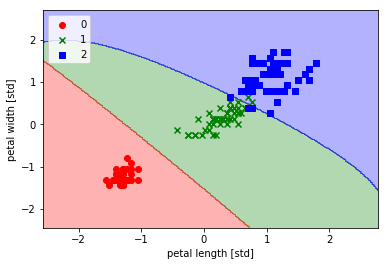

In [4]:
# 支持向量機（5）
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(X, y, classifier, resolution=0.02):
    markers = ('o', 'x', 's') # 有三個類別
    colors = ('red', 'green', 'blue') # 有三個類別
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], c = cmap(idx), marker = markers[idx], label = cl)

plot_decision_boundary(X = X_std, y = y, classifier = svm) # 換分類器
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()

In [5]:
# 支持向量機（6）
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


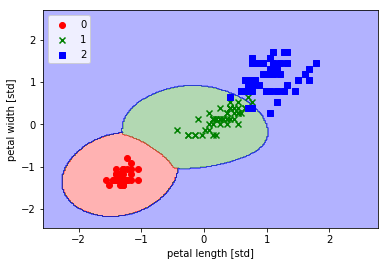

In [6]:
# 支持向量機（7）
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 2) # gamma = 2
svm.fit(X_train, y_train)

plot_decision_boundary(X = X_std, y = y, classifier = svm) # 換分類器
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()

In [7]:
# 支持向量機（8）
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


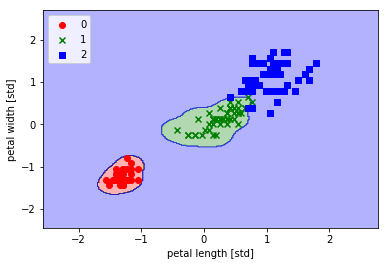

In [8]:
# 支持向量機（9）
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 20) # gamma = 20
svm.fit(X_train, y_train)

plot_decision_boundary(X = X_std, y = y, classifier = svm) # 換分類器
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()

In [9]:
# 支持向量機（10）
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


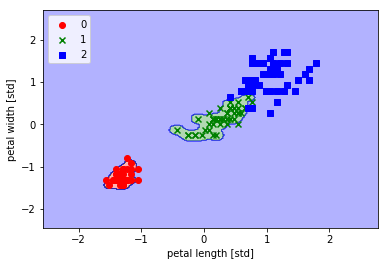

In [10]:
# 支持向量機（11）
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 100) # gamma = 100
svm.fit(X_train, y_train)

plot_decision_boundary(X = X_std, y = y, classifier = svm) # 換分類器
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()

In [11]:
# 支持向量機（12）
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.80


## 決策樹

- 好解釋的分類器
- 用不同的門檻值切分變數
- 以**最大化**資訊增益值為目標

$$IG(D_p) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})$$

- 資訊值有三種計算方式：
    - 錯誤率（Error）
    - 吉尼指標（Gini Index）
    - 熵（Entropy）（\*）

## 決策樹（2）

- 這三個計算方式都跟**錯誤率（Error）**計算有關
- [混淆矩陣（Confusion Matrix）](https://en.wikipedia.org/wiki/Confusion_matrix)

|   |陽性|陰性|
|---|---|----|
|陽性|5|5|
|陰性|6|6|

- $\text{準確率（Accuracy）}= \frac{5 + 6}{5 + 5 + 6 + 6} = 0.5$
- $\text{錯誤率（Error）} = 1 - \text{Accuracy} = 1 - 0.5 = 0.5$

## 決策樹（3）

|計算方式|資訊值公式|
|-------|--------|
|錯誤率|$1 - accuracy$|
|吉尼指標|$1 - accuracy^2 - error^2$|
|熵|$-(accuracy\log_2(accuracy) + error\log_2(error))$|

## 決策樹（4）

![Decision Tree Metrics](https://storage.googleapis.com/py_ml_images/tree_metrics.png)

- 先計算各個節點的資訊值
- A 情況：

|計算方式|$I(D_p)$|$I(D_{left})$|$I(D_{right})$|
|-------|-----------|---------------|----------------|
|錯誤率|$40/80 = 0.5$|$10/40 = 0.25$|$10/40 = 0.25$|
|吉尼指標|$1-0.5^2-0.5^2 = 0.5$|$1-0.75^2-0.25^2 = 0.375$|$1-0.75^2-0.25^2 = 0.375$|
|熵|$-(0.5log_2(0.5)+0.5+0.5log_2(0.5)+0.5) = 1$|$-(0.75log_2(0.75)+0.25log_2(0.25)) = 0.81$|$-(0.75log_2(0.75)+0.25log_2(0.25)) = 0.81$|

## 決策樹（5）

![Decision Tree Metrics](https://storage.googleapis.com/py_ml_images/tree_metrics.png)

- 先計算各個節點的資訊值
- B 情況：

|計算方式|$I(D_p)$|$I(D_{left})$|$I(D_{right})$|
|-------|-----------|---------------|----------------|
|錯誤率|$40/80 = 0.5$|$20/60 = 1/3$|$0/20 = 0$|
|吉尼指標|$1-0.5^2-0.5^2 = 0.5$|$1-(2/3)^2-(1/3)^2 = 1/3$|$1-1^2-0^2 = 0$|
|熵|$-(0.5log_2(0.5)+0.5+0.5log_2(0.5)+0.5) = 1$|$-(2/3log_2(2/3)+(1/3)log_2(1/3)) = 0.92$|$-(1log_2(1)+0log_2(0)) = 0$|

## 決策樹（6）

![Decision Tree Metrics](https://storage.googleapis.com/py_ml_images/tree_metrics.png)

- 最後計算**資訊增益值**：

|計算方式|情況 A 資訊增益值|情況 B 增益值|
|-------|-----|------|
|錯誤率|$0.5-\frac{40}{80}\times0.25-\frac{40}{80}\times0.25 = 0.25$|$0.5-\frac{6}{8}\times\frac{1}{3}-0=0.25$|
|吉尼指標|$0.5-\frac{4}{8}\times0.375-\frac{4}{8}\times0.375=0.125$|$1-\frac{6}{8}\times0.\bar{4}-0=0.1\bar{6}$|
|熵|$0.5-\frac{4}{8}\times0.81-\frac{4}{8}\times0.81=0.125$|$1-\frac{6}{8}\times0.92-0=0.31$|

- 因此實務使用熵（Entropy）居多

## 決策樹（7）

- 不用自己寫
- 透過 `from sklearn.tree import DecisionTreeClassifier` 獲得

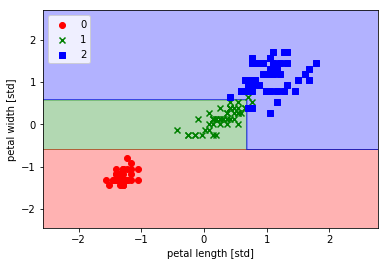

In [12]:
# 決策樹（8）
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, random_state = 0)
tree.fit(X_train, y_train)
plot_decision_boundary(X = X_std, y = y, classifier = tree) # 換分類器
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()

## 決策樹（9）

![GraphViz Decision Tree](https://storage.googleapis.com/py_ml_images/tree_graphviz.png)

In [13]:
# 決策樹（10）
from sklearn.metrics import accuracy_score

y_pred = tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


## K 最近鄰

![knn](https://storage.googleapis.com/py_ml_images/knn.png)

## K 最近鄰（2）

- 不用自己寫
- 透過 `from sklearn.neighbors import KNeighborsClassifier` 獲得

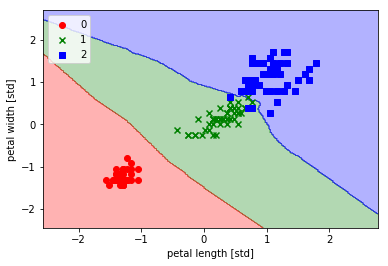

In [14]:
# K 最近鄰（3）
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
plot_decision_boundary(X = X_std, y = y, classifier = knn) # 換分類器
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()

In [15]:
# 決策樹（10）
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 1.00
